In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
file = 'top_large/signal_test.txt'
df = pd.read_csv(file,sep=r'\s+')

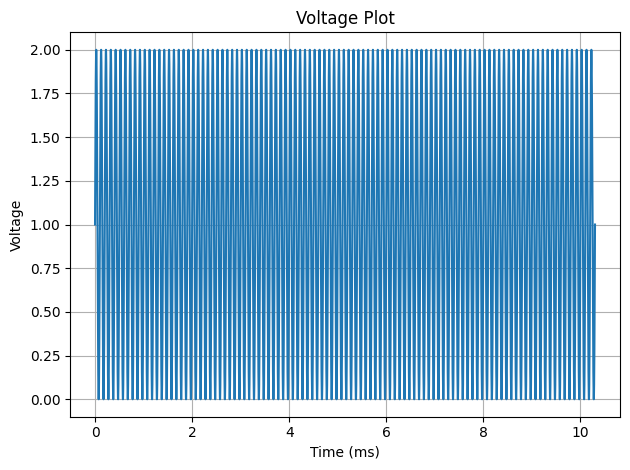

0.0
0.0103
143267


In [25]:
#Time Domain
time = df['time'].values
va = df['va'].values
test = df['test'].values

plt.plot(time*1e3, test)
plt.title('Voltage Plot')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage')
plt.grid(True)
plt.tight_layout()
plt.show()

print(min(time))
print(max(time))
print(len(time))

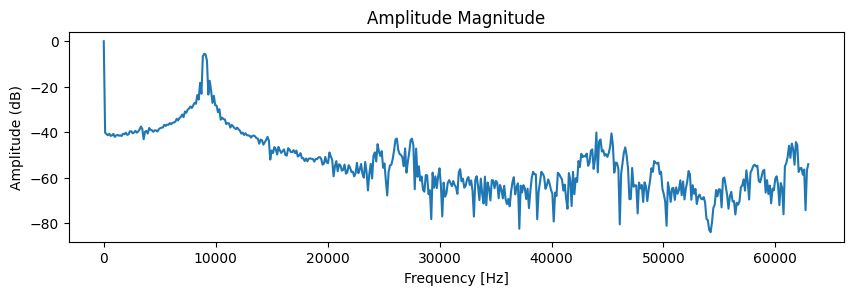

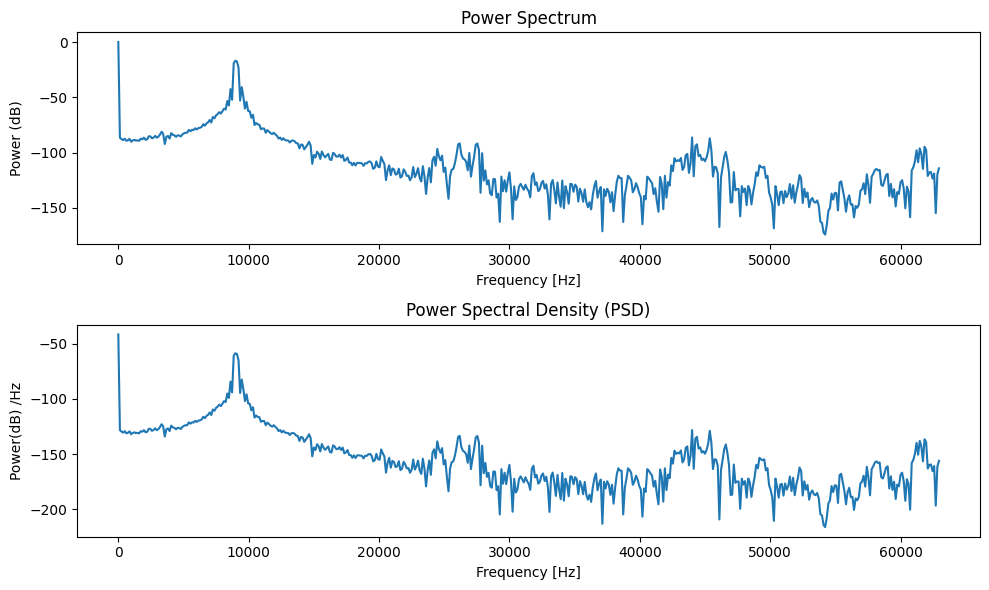

In [31]:
bits = 10
num_sample = 2**bits
n_tstep = 100e-9 # 10 us unit
t_step = 10e-6
n_step = int(t_step/n_tstep)

n_start = int(29 + n_step)
n_stop = int(n_start + num_sample*n_step)

time_samp = time[n_start:n_stop:n_step]
tnom_samp = test[n_start:n_stop:n_step]

ts = time_samp[1] - time_samp[0]
fs = 1/ts
fs_step = fs /num_sample
fy = np.fft.fft(tnom_samp) 
fy_mag = np.abs(fy) / num_sample
fy_mag_plot = 2 * fy_mag[0:int(num_sample/2+1)]
fy_mag_plot[0] = fy_mag_plot[0] / 2

fx = np.linspace(0, (num_sample-1)*fs_step, num_sample)
fx_plot = fx[0:int(num_sample/2+1)]

# Power Spectrum (linear scale)
power_spectrum = fy_mag ** 2

# Power Spectral Density (PSD)
psd = power_spectrum / fs_step

# One-sided spectrum for plotting
half = num_sample // 2 + 1
fy_mag_plot = 2 * fy_mag[:half]
fy_mag_plot[0] /= 2  # DC component not doubled
fy_mag_db = 20*np.log10(fy_mag_plot)

power_plot = 2 * power_spectrum[:half]
power_plot[0] /= 2
power_plot = 20*np.log10(power_plot)
psd_plot = 2 * psd[:half]
psd_plot[0] /= 2
psd_plot = 20*np.log10(psd_plot)
# Frequency axis
fx_plot = np.linspace(0, fs / 2, half)

#Using Windowing
'''
mag_windowed = np.hamming(num_sample) * tnom_samp
fft_windowed = np.fft.fft(mag_windowed)
fft_windowed_plot = fft_windowed[:num_sample//2]
freq_windowed_plot = np.fft.fftfreq(num_sample, d=1/ts)[:num_sample//2]
power_spectrum_windowed_plot = 20*np.log10(np.abs(fft_windowed_plot))
power_ref = np.max(power_spectrum_windowed_plot)
mag_plot = power_spectrum_windowed_plot - power_ref

# Plot Amplitude Magnitude in dB
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(freq_windowed_plot, mag_plot)
plt.title('Amplitude Magnitude')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude (dB)')
'''
# Plot Amplitude Magnitude in dB
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(fx_plot, fy_mag_db)
plt.title('Amplitude Magnitude')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude (dB)')

# Plot Power Spectrum
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(fx_plot, power_plot)
plt.title('Power Spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power (dB)')

# Plot Power Spectral Density
plt.subplot(2, 1, 2)
plt.plot(fx_plot, psd_plot)
plt.title('Power Spectral Density (PSD)')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power(dB) /Hz')
plt.tight_layout()
plt.show()

In [13]:
first_spur = np.unique(fy_mag_db)[-2]
second_spur = np.unique(fy_mag_db)[-3]
SFDR = first_spur - second_spur
idx_spur = np.where(fy_mag_db==first_spur)[0]
idx_spur2 = np.where(fy_mag_db==second_spur)[0]
fundamental_freq = fx_plot[idx_spur]
fundamental_freq2 = fx_plot[idx_spur2]

# Find fundamental (ignore DC at index 0)
fund_index = np.argmax(power_plot[1:]) + 1
fundamental = power_plot[fund_index]

# Mask fundamental to find next largest spur
masked_db = np.copy(power_plot)
masked_db[fund_index] = -np.inf  # Ignore fundamental
spurious = np.max(masked_db)

sfdr = fundamental - spurious

print(f'Fundamental Spur: {first_spur}')
print(f'The largest Spur: {second_spur}')
print(f'SFDR: {SFDR}')
print(f'Fundamental Freq: {fundamental_freq}')
print(f'Fundamental Freq2: {fundamental_freq2}')

print(f'Fundamental Spur: {fundamental}')
print(f'The largest Spur: {spurious}')
#print(f'The Second Spur: {second_spur}')
print(f'SFDR: {sfdr}')

Fundamental Spur: -1.221954773107176
The largest Spur: -1.4980363989738046
SFDR: 0.27608162586662854
Fundamental Freq: [8850.79324255]
Fundamental Freq2: [8973.72092647]
Fundamental Spur: -8.464509459493975
The largest Spur: 8.685962366688507
SFDR: -17.150471826182482
